## Data cleaning and completion for table: GeneralData

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import sys

sys.path.append('../')

In [72]:
from  team_11.task7.task7 import translate_dataframe, extract_hebrew_content, contains_hebrew

In [73]:
os.getcwd()

'/home/michael/Projects/DSlab2/data-science2-lab-final-project/src/team_4'

In [74]:
# Load the provided Excel file
# The data is present in the data folder two directories up
data_dir = os.path.abspath(os.path.join(os.getcwd(),"..","data"))
dataset_path = os.path.join(data_dir, "rehospitalization.xlsx")
OutPutDate = r'CompleteGeneralData.xlsx'

In [120]:
# Load the 'GeneralData' sheet into a DataFrame for cleaning and completion
general_data_df = pd.read_excel(dataset_path, sheet_name='GeneralData')

# Display the first few rows to understand the structure and identify potential issues
general_data_df.head()

,Patient,age,Gender,גורם משלם,משקל,גובה,BMI,מחלות כרוניות,השכלה,מספר ילדים,מצב משפחתי,תרופות קבועות
0,1043772,84,זכר,כללית,92.0,170.0,34.2,1,ללא,3,נשוי,"10815 , 11282 , 1183 , 1196 , 12758 , 13027 ,..."
1,77493,89,נקבה,‎ממון עצמי-לא מב‎,45.0,150.0,21.4,0,NaN,1,גרוש,"10337 , 1130 , 1448 , 1466 , 186 , 2482 , 290..."
2,37680,87,זכר,‎ממון עצמי-לא מב‎,67.7,165.0,24.9,0,פנסיונר,2,נשוי,"1183 , 1310 , 2451 , 2566 , 4967 , 6718 , 672..."
3,70066,90,נקבה,מאוחדת,94.0,165.0,31.6,0,NaN,1,גרוש,"1100 , 1181 , 1182 , 1183 , 12757 , 1283 , 12..."
4,13616,87,זכר,כללית,70.0,163.0,26.3,0,NaN,3,נשוי,"10214 , 1212 , 12725 , 2882 , 6737 , 7852 , 7..."


In [121]:
def summary(df):
    nonnans = df.shape[0] - df.isna().sum()
    nonnansPrc = (nonnans / df.shape[0] * 100).apply("{0:.2f}%".format)
    sam = df.sample(1, random_state=42).squeeze()
    res = pd.DataFrame([sam.index, df.dtypes.astype(str), nonnans,
                        nonnansPrc, df.nunique(), sam]).transpose()
    res.columns = ["Column", "data type", "non-null values", 
                   "non-null values %", "unique values", "example"]
    res.sort_values("unique values",ascending=False, inplace=True)
    return res

In [122]:
summary(general_data_df)

,Column,data type,non-null values,non-null values %,unique values,example
0,Patient,int64,4535,100.00%,4535,144443
11,תרופות קבועות,object,4495,99.12%,4490,"1183 , 2213 , 5913"
8,השכלה,object,2641,58.24%,648,NaN
6,BMI,float64,3504,77.27%,308,28.3
4,משקל,float64,3718,81.98%,177,80.0
5,גובה,float64,3698,81.54%,83,168.0
1,age,int64,4535,100.00%,42,98
9,מספר ילדים,object,4373,96.43%,21,2
3,גורם משלם,object,4524,99.76%,7,‎ממון עצמי-לא מב‎
10,מצב משפחתי,object,4474,98.65%,5,נשוי


# Education  
education column contains a lot of free form text and requires special treatment.


In [124]:
general_data_df.rename(columns={"השכלה": "education"},inplace=True)
general_data_df.education = general_data_df.education.astype(str)

In [125]:
import re
def spl(n):
    if n!=None:
        return re.split(', |\. | |,|\.|\\|- |-|\/|\+|\(|\)', str(n))
    else:
        return [""]

def token_analysis(col,sortby = "cnt", ascending=False):
    #"token"
    names = col.apply(func=spl).values.tolist()
    #print(names)
    words = sum(names,[])
    
    unique, counts = np.unique(words, return_counts=True)
    wc = pd.DataFrame({"token":unique, "cnt": counts})
    
    tokens = wc.sort_values(sortby,ascending=ascending).reset_index(drop=True)
    return tokens

First, let's see what kind of words can we see in the column  
Analyze frequencies of all unique words in the education column

In [126]:
ta = token_analysis(general_data_df['education'])
print(ta.shape)
ta.head(20)

(644, 2)


,token,cnt
0,nan,1894
1,פנסיונר,595
2,פנסיונרית,403
3,לא,269
4,פנסיה,165
5,עובד,160
6,,159
7,עובדת,143
8,גימלאית,88
9,בית,84


In [127]:
ta.to_excel("tokens.xlsx")

### tokens_dict2

In [128]:
tokdic = pd.read_excel("tokens_dict2.xlsx")

In [130]:
for col in tokdic.columns:
    tmp = tokdic[col][~tokdic[col].isna()].reset_index(drop=True)
    tokdic[col] = tmp.sort_values().reset_index(drop=True)

In [131]:
tokdic.dropna(axis = 0, how="all")

,pension,pension_n,assignment,assignment_n,role,role_n,status,status_n,negation,negation_n,junk,junk_n
0,בגמלאות,1.0,Jשמל,1.0,אב,1.0,בשבץ,1.0,אין,1.0,אגד,1.0
1,בפנסיה,1.0,אבטחה,1.0,אגרונום,1.0,חולה,1.0,אינה,10.0,איש,1.0
2,גימאלית,1.0,אדמניסטרטיבי,1.0,אומן,1.0,מצבו,1.0,אינו,13.0,אתו,1.0
3,גימלאי,1.0,אוויר,1.0,אונקולוג,1.0,נכה,1.0,לא\s?,15.0,בארקיע,1.0
4,גימלאית,1.0,אווירית,1.0,אחות,1.0,נכות,1.0,ללא,22.0,בבעברו,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
314,NaN,NaN,תעשיה,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,תעשייה,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,NaN,NaN,תעשייתי,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317,NaN,NaN,תפירה,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
symbols = {'pension': 'P',     
           'assignment': 'A',    
           'role': 'R',       
           'status': 'S',  
           'negation': 'N',
           'junk': 'J'}

In [133]:
tokdic.loc[:,['pension']]

,pension
0,בגמלאות
1,בפנסיה
2,גימאלית
3,גימלאי
4,גימלאית
...,...
638,NaN
639,NaN
640,NaN
641,NaN


In [134]:
tokendb = tokdic.loc[:,list(symbols.keys())]
tokendb.loc[:,'len'] = tokendb['pension'].str.len()

In [137]:
tokendb.to_excel("tokendb.xlsx")

In [138]:
def research(text, patt, grp=0):       
    result = re.search(patt, text)
    return result.group(grp) if result else None

def construct_pattern(col):
    tokendb.loc[:,'len'] = tokendb[col].str.len()
    tdb = tokendb.sort_values(['len',col], ascending=False)
    patt_col = tdb.loc[~tdb[col].isna(),col]
    patt_col = [re.escape(patt) for patt in patt_col]
    pattern = "|".join(patt_col)
    return pattern

pattern = []
syms = []

pattern.append('\d+([,.]\d+)?') 
syms.append('J')
for tok, sym in symbols.items():    
    #tokens = 'pension'
    pattern.append(construct_pattern(tok))
    syms.append(sym) 
     
pattern.append(r'(, |\. |,|\.|\\|- |-|\/|\+|\(|\))+')
syms.append(' ')



def split_name2(text):

    templ = str(text)        
    status=[]
    role = []
    assgn = []
    job = []
    for pat, sym in zip(pattern, syms):
        found = re.findall(pat, templ)
        if found:
            if sym == 'P':
                status.append("pension")
            if sym == 'N':
                status.append("not working")
            if sym == 'S':
                status.append("disabled")
            if sym == 'R':
                job.append(found)
            if sym == 'A':
                job.append(found)
                
        templ = re.sub(pat, sym, templ).strip()
    job = sum(job,[])
    job.reverse()
    job = " ".join(job)
    status = " ".join(status)
    return {"template": templ, "status": status,"job": job}


In [139]:
data = general_data_df[["education"]].dropna()# .loc[:1000]
data

,education
0,ללא
1,nan
2,פנסיונר
3,nan
4,nan
...,...
4530,אלקטרונאי בפנסיה
4531,nan
4532,פנסיונר
4533,תיווך


In [140]:
applied_df = data.apply(lambda row: split_name2(row.education), axis='columns', result_type='expand')
df = pd.concat([data, applied_df], axis='columns')

In [141]:
df.head(50)

,education,template,status,job
0,ללא,N,not working,
1,nan,nan,,
2,פנסיונר,P,pension,
3,nan,nan,,
4,nan,nan,,
5,פנסיה. לפני בטקסטיל.,P J A,pension,בטקסטיל
6,nan,nan,,
7,nan,nan,,
8,פנסיונר,P,pension,
9,עסק פרטי - בעלת חנות,R A J A,,עסק חנות פרטי


### extract categories

### let's try N-grams

In [142]:
import nltk

In [143]:
nltk.download('punkt_tab',)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/michael/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [146]:
def ngrams(item, n=2):
    item = str(item)
    patt = r'(, |\. |,|\.|\\|- |-|\/|\+|\(|\))+'
    item = re.sub(patt, " ", item)
    tokens = nltk.word_tokenize(item)
    return list(nltk.ngrams(tokens, n))

In [158]:
bigrams = sum(data.education.apply(ngrams, n=2),[])
trigrams = sum(data.education.apply(ngrams, n=3),[])

In [160]:
BigramFD = nltk.FreqDist(bigrams)
TrigramFD = nltk.FreqDist(trigrams)

In [161]:
def best_ngram(job):
    bigrams = ngrams(job,n=2)
    if bigrams==[]:
        return job
    bgs = {bg: BigramFD[bg]*2 for bg in bigrams}
    
    trigrams = ngrams(job,n=3)
    tgs = {tg: TrigramFD[tg]*3 for tg in trigrams}
    bgs.update(tgs)

    gram = max(bgs, key=bgs.get)
    return " ".join(gram)

In [162]:
def extract_class(text):
    text = str(text)
    text = re.sub('\d+([,.]\d+)?', "", text).strip()
    text = re.sub(r'"|(, |\. |,|\.|\\|- |-|\/|\+|\(|\))+', "", text).strip()

    words = text.split(" ")
    job = []    
    status=""

  
    for word in words:  
        
        if word in tokendb.negation.values :
            status = "not working"
            continue
        if word in tokendb.pension.values  :
            status = "pension"
            continue           
        if word in tokendb.status.values  :
            status = "disabled"
            continue
        if word in tokendb.assignment.values  :
            job.append(word)
            continue
        if word in tokendb.role.values  :
            job.append(word)
            continue   

    job = best_ngram(" ".join(job))
    
    return {"status": status,"job": job}



In [163]:
data = general_data_df[["education"]].dropna()

In [164]:
applied_df = data.apply(lambda row: extract_class(row.education), axis='columns', result_type='expand')
data = pd.concat([data, applied_df], axis='columns')

In [165]:
test = data[data.education.str.contains(" ")]
test[:50]

,education,status,job
5,פנסיה. לפני בטקסטיל.,,בטקסטיל
9,עסק פרטי - בעלת חנות,,עסק פרטי
20,יועץ לאדריכלים,,יועץ לאדריכלים
32,לא עובדת,,
33,לא עובדת גימלאית .,pension,
51,חינוך מיוחד,,חינוך מיוחד
55,נהג אוטובוס,,נהג אוטובוס
57,עצמאי מכניקה,,עצמאי מכניקה
59,"גימלאי, עבד כמסגר",,כמסגר
77,לא עובד,,


In [166]:
unique, counts = np.unique(data.job, return_counts=True)
wc = pd.DataFrame({"token":unique, "cnt": counts})

lal = wc.sort_values("cnt",ascending=False).reset_index(drop=True)
lal[:50]

,token,cnt
0,,3772
1,עקרת בית,68
2,אחות,24
3,מורה,24
4,חקלאי,14
5,מהנדס,14
6,עצמאי,13
7,נהג מונית,11
8,נהג,10
9,רופא,10


In [66]:
lal.to_csv("temp2.csv", index = False)

In [170]:
general_data_df["status"] =  data["status"]
general_data_df["job"] =  data["job"]
general_data_df

,Patient,age,Gender,גורם משלם,משקל,גובה,BMI,מחלות כרוניות,education,מספר ילדים,מצב משפחתי,תרופות קבועות,education,status,job
0,1043772,84,זכר,כללית,92.0,170.0,34.2,1,ללא,3,נשוי,"10815 , 11282 , 1183 , 1196 , 12758 , 13027 ,...",ללא,not working,
1,77493,89,נקבה,‎ממון עצמי-לא מב‎,45.0,150.0,21.4,0,nan,1,גרוש,"10337 , 1130 , 1448 , 1466 , 186 , 2482 , 290...",nan,,
2,37680,87,זכר,‎ממון עצמי-לא מב‎,67.7,165.0,24.9,0,פנסיונר,2,נשוי,"1183 , 1310 , 2451 , 2566 , 4967 , 6718 , 672...",פנסיונר,pension,
3,70066,90,נקבה,מאוחדת,94.0,165.0,31.6,0,nan,1,גרוש,"1100 , 1181 , 1182 , 1183 , 12757 , 1283 , 12...",nan,,
4,13616,87,זכר,כללית,70.0,163.0,26.3,0,nan,3,נשוי,"10214 , 1212 , 12725 , 2882 , 6737 , 7852 , 7...",nan,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530,5473,82,זכר,‎ממון עצמי-לא מב‎,69.0,180.0,21.3,0,אלקטרונאי בפנסיה,3,נשוי,"1150 , 1682 , 2043 , 2150 , 2188 , 2566 , 260...",אלקטרונאי בפנסיה,pension,אלקטרונאי
4531,980451,79,זכר,מכבי,64.0,170.0,22.1,0,nan,4,נשוי,NaN,nan,,
4532,430555,99,זכר,כללית,60.0,170.0,20.8,0,פנסיונר,3,אלמן,"12284 , 2384 , 2412 , 2791 , 2843 , 3211 , 32...",פנסיונר,pension,
4533,737553,75,זכר,מכבי,97.0,170.0,33.6,0,תיווך,3,נשוי,"1183 , 12730 , 1637 , 2568 , 37 , 3724 , 4856...",תיווך,,תיווך


## Translate hebrew content into english 

In [13]:
content = extract_hebrew_content(general_data_df)

In [14]:
content

{'columns': ['גורם משלם',
  'משקל',
  'גובה',
  'מחלות כרוניות',
  'מספר ילדים',
  'מצב משפחתי',
  'תרופות קבועות'],
 'content': ['זכר',
  'נקבה',
  'כללית',
  'ממון עצמי-לא מב',
  'מאוחדת',
  'מכבי',
  'לאומית',
  'שרות בתי הסוהר',
  'תייר/תעריף מלא',
  '1 2 נפטרו',
  '2 ילדים בחוץ לארץ',
  'נכדה אחת',
  'אין',
  'נשוי',
  'גרוש',
  'אלמן',
  'רווק',
  'פרוד']}

In [15]:
c = content['columns'] + content['content'] 
c

['גורם משלם',
 'משקל',
 'גובה',
 'מחלות כרוניות',
 'מספר ילדים',
 'מצב משפחתי',
 'תרופות קבועות',
 'זכר',
 'נקבה',
 'כללית',
 'ממון עצמי-לא מב',
 'מאוחדת',
 'מכבי',
 'לאומית',
 'שרות בתי הסוהר',
 'תייר/תעריף מלא',
 '1 2 נפטרו',
 '2 ילדים בחוץ לארץ',
 'נכדה אחת',
 'אין',
 'נשוי',
 'גרוש',
 'אלמן',
 'רווק',
 'פרוד']

In [16]:
# take output of c, put it into google translate, paste the translated text as t:
# correct any mistakes or redundant values if necessary
t = ['Paying factor', 'Weight', 'Height', 'Chronic diseases',
     'Number of children', 'Marital status', 'Regular medications',
     'Male', 'Female', 'General', 'Self-financed Not from', 'Mauhedat',
     'Maccabi', 'National', 'Prison services', 'Tourist/full rate', '1 + 2 (deceased)',
     '2 ( children abroad)', 'one granddaughter', 'none', 'married', 'divorced', 
     'widowed', 'single', 'separated']

In [17]:
# copy-paste the output of d as translate_dict
d ={k:v for k,v in zip(c,t)}
d

{'גורם משלם': 'Paying factor',
 'משקל': 'Weight',
 'גובה': 'Height',
 'מחלות כרוניות': 'Chronic diseases',
 'מספר ילדים': 'Number of children',
 'מצב משפחתי': 'Marital status',
 'תרופות קבועות': 'Regular medications',
 'זכר': 'Male',
 'נקבה': 'Female',
 'כללית': 'General',
 'ממון עצמי-לא מב': 'Self-financed Not from',
 'מאוחדת': 'Mauhedat',
 'מכבי': 'Maccabi',
 'לאומית': 'National',
 'שרות בתי הסוהר': 'Prison services',
 'תייר/תעריף מלא': 'Tourist/full rate',
 '1 2 נפטרו': '1 + 2 (deceased)',
 '2 ילדים בחוץ לארץ': '2 ( children abroad)',
 'נכדה אחת': 'one granddaughter',
 'אין': 'none',
 'נשוי': 'married',
 'גרוש': 'divorced',
 'אלמן': 'widowed',
 'רווק': 'single',
 'פרוד': 'separated'}

In [18]:
translate_dict= {'גורם משלם': 'Paying agent',
 'משקל': 'Weight',
 'גובה': 'Height',
 'מחלות כרוניות': 'Chronic diseases',
 'מספר ילדים': 'Number of children',
 'מצב משפחתי': 'Marital status',
 'תרופות קבועות': 'Regular medications',
 'זכר': 'Male',
 'נקבה': 'Female',
 'כללית': 'Clalit',
 'ממון עצמי-לא מב': 'Self-financed',
 'מאוחדת': 'Meuhedet',
 'מכבי': 'Maccabi',
 'לאומית': 'Leumit',
 'שרות בתי הסוהר': 'Prison services',
 'תייר/תעריף מלא': 'Tourist/full rate',
 "1 2 \u05e0\u05e4\u05d8\u05e8\u05d5": "3",
 "2 \u05d9\u05dc\u05d3\u05d9\u05dd \u05d1\u05d7\u05d5\u05e5 \u05dc\u05d0\u05e8\u05e5": "2",
 "\u05e0\u05db\u05d3\u05d4 \u05d0\u05d7\u05ea": "1",
 'אין': 'none',
 'נשוי': 'married',
 'גרוש': 'divorced',
 'אלמן': 'widowed',
 'רווק': 'single',
 'פרוד': 'separated'}

In [19]:
general_data_df = translate_dataframe(general_data_df, translate_dict )

In [20]:
# validate that all the hebrew text was translated.
# if not, that's probably due to special characters 
content = extract_hebrew_content(general_data_df)
content

{'columns': [], 'content': []}

In [21]:
general_data_df

,Patient,age,Gender,Paying agent,Weight,Height,BMI,Chronic diseases,Number of children,Marital status,Regular medications
0,1043772,84,Male,Clalit,92.0,170.0,34.2,1,3,married,"10815, 11282, 1183, 1196, 12758, 13027, 1333, ..."
1,77493,89,Female,Self-financed,45.0,150.0,21.4,0,1,divorced,"10337, 1130, 1448, 1466, 186, 2482, 2907, 3261..."
2,37680,87,Male,Self-financed,67.7,165.0,24.9,0,2,married,"1183, 1310, 2451, 2566, 4967, 6718, 6720, 6737..."
3,70066,90,Female,Meuhedet,94.0,165.0,31.6,0,1,divorced,"1100, 1181, 1182, 1183, 12757, 1283, 12946, 13..."
4,13616,87,Male,Clalit,70.0,163.0,26.3,0,3,married,"10214, 1212, 12725, 2882, 6737, 7852, 7999, 92..."
...,...,...,...,...,...,...,...,...,...,...,...
4530,5473,82,Male,Self-financed,69.0,180.0,21.3,0,3,married,"1150, 1682, 2043, 2150, 2188, 2566, 2606, 2897..."
4531,980451,79,Male,Maccabi,64.0,170.0,22.1,0,4,married,NaN
4532,430555,99,Male,Clalit,60.0,170.0,20.8,0,3,widowed,"12284, 2384, 2412, 2791, 2843, 3211, 3298, 347..."
4533,737553,75,Male,Maccabi,97.0,170.0,33.6,0,3,married,"1183, 12730, 1637, 2568, 37, 3724, 4856, 6432,..."


In [22]:
# Check for missing data
# Get basic statistics to identify potential outliers and data ranges
summary(general_data_df)

,Column,data type,non-null values,non-null values %,unique values,example
0,Patient,int64,4535,100.00%,4535,144443
10,Regular medications,object,4495,99.12%,4490,"1183, 2213, 5913"
6,BMI,float64,3504,77.27%,308,28.3
4,Weight,float64,3718,81.98%,177,80.0
5,Height,float64,3698,81.54%,83,168.0
1,age,int64,4535,100.00%,42,98
8,Number of children,object,4373,96.43%,21,2
3,Paying agent,object,4524,99.76%,7,Self-financed
9,Marital status,object,4474,98.65%,5,married
2,Gender,object,4535,100.00%,2,Male


In [38]:
pd.DataFrame(general_data_df.describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
Patient,4535.0,360635.420507,325399.296102,31.000000,87996.500000,241523.000000,602290.000000,1171452.000
age,4535.0,80.147078,8.640097,65.000000,73.000000,80.000000,87.000000,111.000
Weight,4535.0,73.221963,15.115812,30.000000,65.000000,72.000000,80.000000,200.000
Height,4535.0,165.472326,7.779043,140.000000,160.000000,165.000000,170.000000,200.000
BMI,4535.0,26.545507,4.797557,13.064305,23.875115,25.951557,28.408174,78.125
Chronic diseases,4535.0,0.137155,0.344049,0.000000,0.000000,0.000000,0.000000,1.000
Number of children,4535.0,3.272326,2.062258,0.000000,2.000000,3.000000,4.000000,15.000


In [ ]:
sns.histplot(general_data_df, x="BMI")

In [28]:
# Identify outliers in 'BMI', 'weight', and 'height'
# For BMI, assume normal human range is 10 to 60
bmi_outliers = general_data_df[(general_data_df['BMI'] < 10) | (general_data_df['BMI'] > 60)]

# For weight, assume normal human range is 30 to 300 kg
weight_outliers = general_data_df[(general_data_df['Weight'] < 30) | (general_data_df['Weight'] > 300)]

# For height, assume normal human range is 140 to 210 cm
height_outliers = general_data_df[(general_data_df['Height'] < 140) | (general_data_df['Height'] > 210)]

bmi_outliers, weight_outliers, height_outliers

(      Patient  age  Gender   Paying agent  Weight  Height       BMI  \
 137   1132829   82  Female         Clalit    57.5    57.5     492.5   
 348    112253   82    Male         Clalit    88.0    80.0     137.5   
 658     51497   94    Male  Self-financed   165.0    60.0     458.3   
 664    184567   91  Female  Self-financed    64.0   450.0       3.2   
 1114   823081   93    Male        Maccabi    80.0    48.0     694.4   
 1268    53726   85  Female       Meuhedet    60.0    58.0     178.4   
 1285   178335   87  Female        Maccabi    63.0   200.0  630000.0   
 1448   128998   73    Male         Clalit    75.0   172.0  750000.0   
 1620   755744   81    Male         Clalit    80.0   178.0      69.9   
 2233   172354   78    Male         Clalit    83.0   170.0  830000.0   
 2488   205368   80    Male         Clalit    56.0    65.0     132.5   
 2671   289488   72    Male         Clalit    74.0    74.0     319.6   
 2700   197599   70    Male  Self-financed    70.0   165.0  7000

In [30]:
# Replace outliers in BMI, weight, and height with NaN
general_data_df.loc[(general_data_df['BMI'] < 10) | (general_data_df['BMI'] > 60), 'BMI'] = np.nan
general_data_df.loc[(general_data_df['Weight'] < 30) | (general_data_df['Weight'] > 300), 'Weight'] = np.nan
general_data_df.loc[(general_data_df['Height'] < 140) | (general_data_df['Height'] > 210), 'Height'] = np.nan

# Recalculate BMI for entries where weight and height are available
general_data_df['BMI'] = general_data_df['Weight'] / ((general_data_df['Height'] / 100) ** 2)

# Display summary of changes
general_data_df[['BMI', 'Weight', 'Height']].describe()

,BMI,Weight,Height
count,3655.000000,3717.00000,3662.000000
mean,26.688510,73.49088,165.584926
std,5.334254,16.68483,8.653187
min,13.064305,30.00000,140.000000
25%,23.183391,61.80000,160.000000
50%,25.951557,72.00000,165.000000
75%,29.386256,83.00000,170.000000
max,78.125000,200.00000,200.000000


In [32]:

# Filling missing values for categorical data using mode
general_data_df['Paying agent'].fillna(general_data_df['Paying agent'].mode()[0], inplace=True)
#general_data_df['השכלה'].fillna(general_data_df['השכלה'].mode()[0], inplace=True)
general_data_df['Marital status'].fillna(general_data_df['Marital status'].mode()[0], inplace=True)

# Filling missing values for numeric data using median
general_data_df['Weight'].fillna(general_data_df['Weight'].median(), inplace=True)
general_data_df['Height'].fillna(general_data_df['Height'].median(), inplace=True)
general_data_df['BMI'].fillna(general_data_df['BMI'].median(), inplace=True)
#general_data_df['Number of children'].fillna(general_data_df['Number of children'].median(), inplace=True)

# Checking if there are any remaining missing values
summary(general_data_df)

/tmp/ipykernel_677789/4243214794.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  general_data_df['Paying agent'].fillna(general_data_df['Paying agent'].mode()[0], inplace=True)
/tmp/ipykernel_677789/4243214794.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

,Column,data type,non-null values,non-null values %,unique values,example
0,Patient,int64,4535,100.00%,4535,144443
10,Regular medications,object,4495,99.12%,4490,"1183, 2213, 5913"
6,BMI,float64,4535,100.00%,1257,28.344671
4,Weight,float64,4535,100.00%,176,80.0
5,Height,float64,4535,100.00%,55,168.0
1,age,int64,4535,100.00%,42,98
8,Number of children,object,4373,96.43%,21,2
3,Paying agent,object,4535,100.00%,7,Self-financed
9,Marital status,object,4535,100.00%,5,married
2,Gender,object,4535,100.00%,2,Male


In [33]:
general_data_df['Number of children'].unique()

array([3, 1, 2, 4, 0, 7, 5, 8, 6, nan, 10, 9, '3', 11, '4 4', 12, '2', 13,
       15, 14, '1', 'none'], dtype=object)

In [35]:
# Attempt to clean 'מספר ילדים' column by converting entries to numeric values
# We'll extract the first number before any non-numeric characters

import re

def extract_numeric(value):
    if isinstance(value, str):
        # Extract the first number that appears in the string
        match = re.search(r'\d+', value)
        if match:
            return int(match.group(0))
        else:
            return np.nan
    return value

# Apply the function to clean the 'מספר ילדים' column
general_data_df['Number of children'] = general_data_df['Number of children'].apply(extract_numeric)

# Now try filling missing values with the median
general_data_df['Number of children'].fillna(general_data_df['Number of children'].median(), inplace=True)

# Check the column to ensure it's clean and filled
general_data_df['Number of children'].describe()


/tmp/ipykernel_677789/3294783957.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  general_data_df['Number of children'].fillna(general_data_df['Number of children'].median(), inplace=True)


count    4535.000000
mean        3.272326
std         2.062258
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        15.000000
Name: Number of children, dtype: float64

In [37]:
# Fill missing values in 'תרופות קבועות' using the mode of the column
general_data_df['Regular medications'].fillna(general_data_df['Regular medications'].mode()[0], inplace=True)

# Verify that there are no remaining missing values
summary(general_data_df)

,Column,data type,non-null values,non-null values %,unique values,example
0,Patient,int64,4535,100.00%,4535,144443
10,Regular medications,object,4535,100.00%,4490,"1183, 2213, 5913"
6,BMI,float64,4535,100.00%,1257,28.344671
4,Weight,float64,4535,100.00%,176,80.0
5,Height,float64,4535,100.00%,55,168.0
1,age,int64,4535,100.00%,42,98
8,Number of children,float64,4535,100.00%,16,2.0
3,Paying agent,object,4535,100.00%,7,Self-financed
9,Marital status,object,4535,100.00%,5,married
2,Gender,object,4535,100.00%,2,Male


In [15]:
# Save the updated dataset to a new Excel File
general_data_df.to_excel(OutPutDate, index=False)

## Units Admissions 

In [16]:
# Load the 'unitsAdmissions' sheet into a DataFrame for EDA
units_admissions_df = pd.read_excel(dataset_path, sheet_name='unitsAdmissions')

# Display the first few rows to understand the structure of the data
units_admissions_df.head()

,תאריך,מחלקה,כמות קבלות
0,2020-01-01,4,7
1,2020-01-02,4,10
2,2020-01-03,4,9
3,2020-01-04,4,13
4,2020-01-05,4,15


In [17]:
# Convert the date column to datetime for better handling
units_admissions_df['תאריך'] = pd.to_datetime(units_admissions_df['תאריך'])

# Summary statistics for the dataset
summary_stats = units_admissions_df.describe()

# Group by 'מחלקה' to get department-wise summary statistics
department_stats = units_admissions_df.groupby('מחלקה')['כמות קבלות'].describe()

summary_stats, department_stats

(                               תאריך        מחלקה   כמות קבלות
 count                           6701  6701.000000  6701.000000
 mean   2022-01-23 07:22:40.811819008     2.947918    11.210118
 min              2020-01-01 00:00:00     1.000000     1.000000
 25%              2021-01-29 00:00:00     2.000000     9.000000
 50%              2022-02-03 00:00:00     3.000000    11.000000
 75%              2023-01-30 00:00:00     4.000000    13.000000
 max              2023-12-31 00:00:00     5.000000    23.000000
 std                              NaN     1.404302     3.348427,
         count       mean       std  min  25%   50%   75%   max
 מחלקה                                                         
 1      1437.0  11.507307  3.321783  1.0  9.0  11.0  14.0  23.0
 2      1298.0  11.114792  3.457852  1.0  9.0  11.0  13.0  23.0
 3      1324.0  10.647281  3.316771  1.0  8.0  11.0  13.0  21.0
 4      1461.0  11.558522  3.185180  4.0  9.0  11.0  13.0  23.0
 5      1181.0  11.153260  3.402549  1.

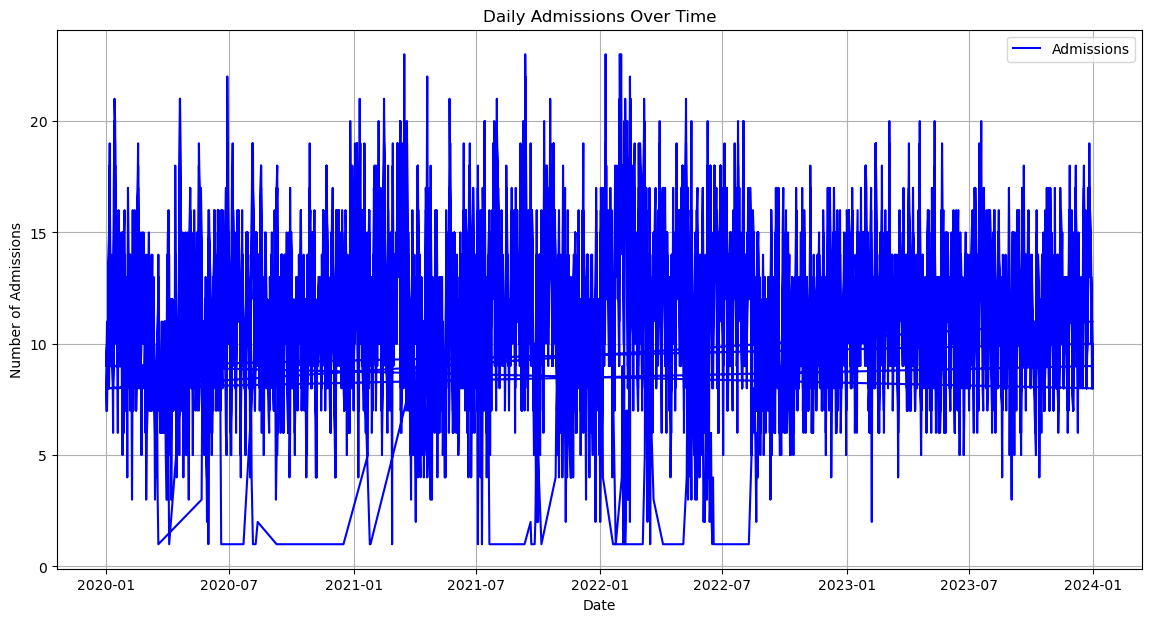

/tmp/ipykernel_117387/3253445059.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trends = units_admissions_df.resample('M', on='תאריך').sum()


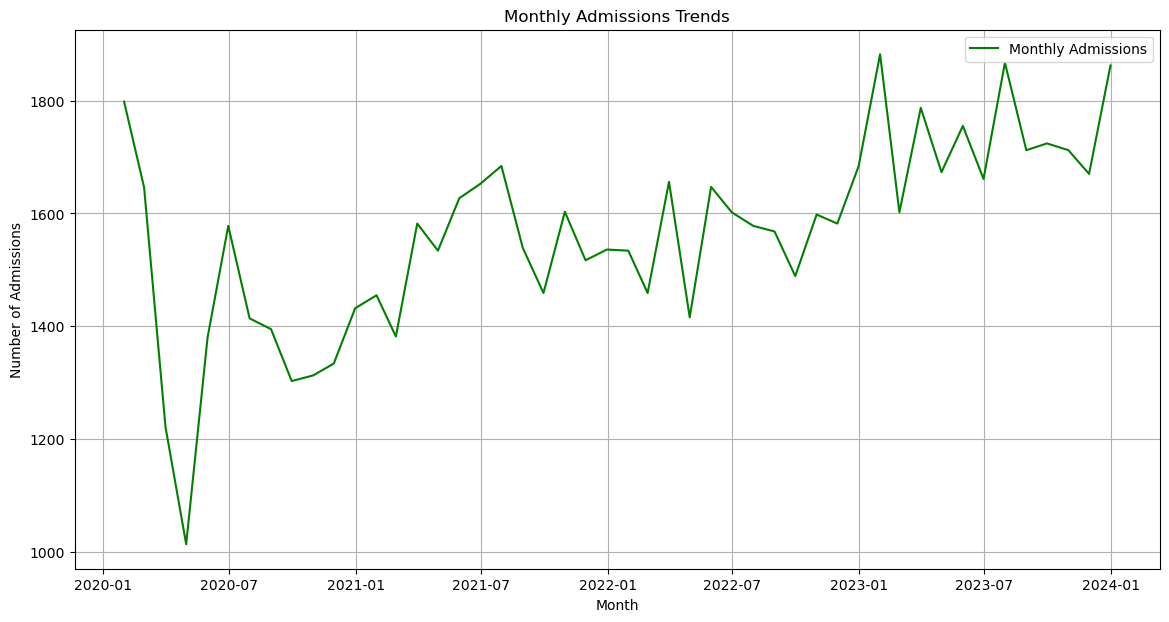

In [23]:
# Plotting the total admissions over time to identify trends and seasonality
plt.figure(figsize=(14, 7))
plt.plot(units_admissions_df['תאריך'], units_admissions_df['כמות קבלות'], label='Admissions', color='blue')
plt.title('Daily Admissions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.legend()
plt.show()

# Aggregating data by month to analyze monthly trends
monthly_trends = units_admissions_df.resample('M', on='תאריך').sum()

# Plotting the monthly admissions trends
plt.figure(figsize=(14, 7))
plt.plot(monthly_trends.index, monthly_trends['כמות קבלות'], label='Monthly Admissions', color='green')
plt.title('Monthly Admissions Trends')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.legend()
plt.show()

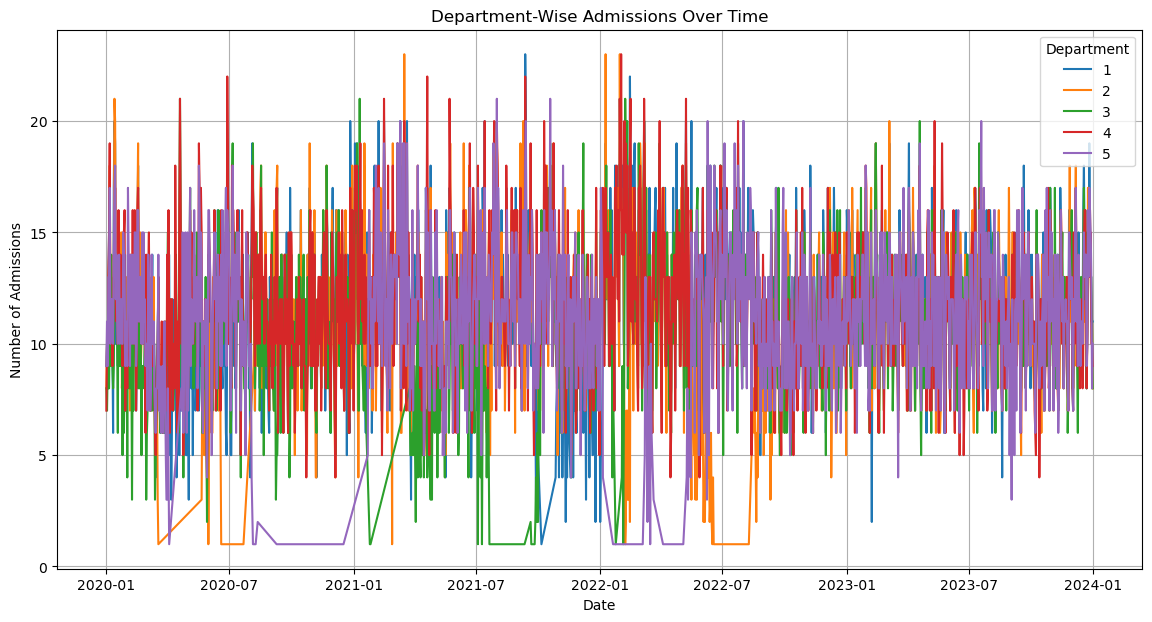

/tmp/ipykernel_117387/236504822.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='מחלקה', y='כמות קבלות', data=units_admissions_df, palette='tab10')


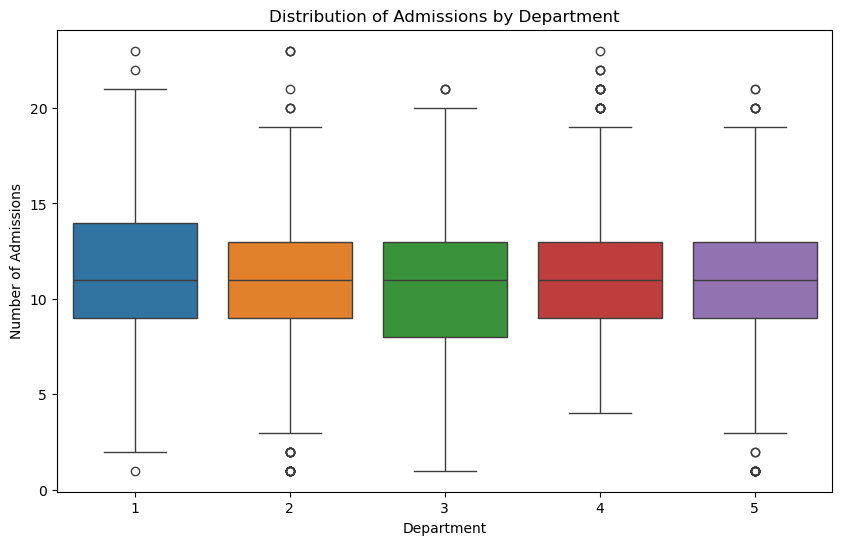

In [24]:
# Plotting department-wise admissions over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='תאריך', y='כמות קבלות', hue='מחלקה', data=units_admissions_df, palette='tab10')
plt.title('Department-Wise Admissions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.legend(title='Department', loc='upper right')
plt.show()

# Boxplot to compare admission distributions across departments
plt.figure(figsize=(10, 6))
sns.boxplot(x='מחלקה', y='כמות קבלות', data=units_admissions_df, palette='tab10')
plt.title('Distribution of Admissions by Department')
plt.xlabel('Department')
plt.ylabel('Number of Admissions')
plt.show()


In [25]:
# Load relevant sheets
hospitalization1_df = pd.read_excel(file_path, sheet_name='hospitalization1')
hospitalization2_df = pd.read_excel(file_path, sheet_name='hospitalization2')
h_doctor_df = pd.read_excel(file_path, sheet_name='hDoctor')

# Convert dates to datetime for comparison
hospitalization1_df['Admission_Entry_Date'] = pd.to_datetime(hospitalization1_df['Admission_Entry_Date'])
hospitalization1_df['Release_Date'] = pd.to_datetime(hospitalization1_df['Release_Date'])
hospitalization2_df['Admission_Entry_Date'] = pd.to_datetime(hospitalization2_df['Admission_Entry_Date'])
hospitalization2_df['Release_Date'] = pd.to_datetime(hospitalization2_df['Release_Date'])

# Sort by Patient and Admission Date to facilitate rehospitalization identification
hospitalization1_df = hospitalization1_df.sort_values(by=['Patient', 'Admission_Entry_Date'])
hospitalization2_df = hospitalization2_df.sort_values(by=['Patient', 'Admission_Entry_Date'])

# Identify rehospitalizations: find cases where the same patient is admitted within 30 days of release
hospitalization1_df['Rehospitalized'] = hospitalization1_df.groupby('Patient')['Admission_Entry_Date'].diff().dt.days <= 30

# Merge with the doctor load data from `hDoctor` for the discharge doctor
doctor_load_df = h_doctor_df.rename(columns={"קוד רופא": "רופא משחרר-קוד"})
merged_df = pd.merge(hospitalization1_df, doctor_load_df, how='left', left_on='רופא משחרר-קוד', right_on='רופא משחרר-קוד')

# Analyzing the relationship between rehospitalization and doctor load
rehospitalization_analysis = merged_df[['Patient', 'Rehospitalized', 'רופא משחרר-קוד', 'כמות מטופלים']].dropna()

# Calculating the correlation between doctor load (number of patients) and rehospitalization
correlation = rehospitalization_analysis['Rehospitalized'].corr(rehospitalization_analysis['כמות מטופלים'])


NameError: name 'file_path' is not defined

In [18]:
correlation

-0.003385919108722247